In [2]:
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr as expr
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [4]:
#coordinates transformmations


x = expr("r*sin(theta)*cos(phi)")
y = expr("r*sin(theta)*sin(phi)")
z = expr("r*cos(theta)")


[
    x.diff("r"), y.diff('r'), z.diff('r'),
]
[
    x.diff("theta"), y.diff('theta'), z.diff('theta'),
]
[
    x.diff("phi"), y.diff('phi'), z.diff('phi'),
]


[sin(theta)*cos(phi), sin(phi)*sin(theta), cos(theta)]

In [48]:
rho = expr("sqrt(r**2 + a**2*cos(theta)**2)")
Delta = expr("r**2 -2*r+a**2")
Sigma = expr("sqrt((r**2+a**2)**2 -a**2*Delta*sin(theta)**2)")
alpha = expr("rho*sqrt(Delta)/Sigma")
omega = expr("2* a*r/Sigma**2")
omega_bar = expr("Sigma*sin(theta)/rho")

P = expr("r**2 + a**2 - a*b")
R = expr("P**2 - Delta*((b-a)**2+q)")
Theta = expr("q-cos(theta)**2* (b**2/sin(theta)**2-a**2)")

d_r = (Delta/rho**2*sp.Symbol("p_r")).simplify()
d_theta = (1/rho**2*sp.Symbol("p_theta")).simplify()


d_phi =     (-(R+Delta*Theta)/(2*Delta*rho**2)).subs({
    "P": P, "Delta": Delta
}).subs({"Delta": Delta}).diff("b").simplify()
d_p_r     = sp.diff((-Delta/(2*rho**2)*sp.Symbol("p_r")**2-1/(2*rho**2)*sp.Symbol("p_theta")**2+((R+Delta*Theta)/(2*Delta*rho**2)).subs({
    "P": P, "Delta": Delta
})),"r").simplify()
d_p_theta = sp.diff((-Delta/(2*rho**2)*sp.Symbol("p_r")**2-1/(2*rho**2)*sp.Symbol("p_theta")**2+((R+Delta*Theta)/(2*Delta*rho**2)).subs({
    "P": P, "Delta": Delta
})),"theta").simplify()

dr = sp.lambdify(sp.symbols("r theta phi p_r p_theta b a"), d_r, cse=True, modules=["math", "mpmath", "sympy"])
dtheta = sp.lambdify(sp.symbols("r theta phi p_r p_theta b a"), d_theta, cse=True, modules=["math", "mpmath", "sympy"])
dphi = sp.lambdify(sp.symbols("r theta phi p_r p_theta b a"), d_phi, cse=True, modules=["math", "mpmath", "sympy"])
dp_r = sp.lambdify(sp.symbols("r theta phi p_r p_theta b a"), d_p_r, cse=True, modules=["math", "mpmath", "sympy"])
dp_theta = sp.lambdify(sp.symbols("r theta phi p_r p_theta b a"), d_p_theta, cse=True, modules=["math", "mpmath", "sympy"])

p_r*(a**2 + r**2 - 2*r)/(a**2*cos(theta)**2 + r**2)

p_theta/(a**2*cos(theta)**2 + r**2)

(p_r**2*(1 - r)*(a**2*cos(theta)**2 + r**2)*(a**2 + r**2 - 2*r)**2*sin(theta)**2 + r*(p_r**2*(a**2 + r**2 - 2*r) + p_theta**2)*(a**2 + r**2 - 2*r)**2*sin(theta)**2 - r*((q*sin(theta)**2 + (a**2*sin(theta)**2 - b**2)*cos(theta)**2)*(a**2 + r**2 - 2*r) + (-(q + (a - b)**2)*(a**2 + r**2 - 2*r) + (a**2 - a*b + r**2)**2)*sin(theta)**2)*(a**2 + r**2 - 2*r) + (1 - r)*(a**2*cos(theta)**2 + r**2)*((q*sin(theta)**2 + (a**2*sin(theta)**2 - b**2)*cos(theta)**2)*(a**2 + r**2 - 2*r) + (-(q + (a - b)**2)*(a**2 + r**2 - 2*r) + (a**2 - a*b + r**2)**2)*sin(theta)**2) + (a**2*cos(theta)**2 + r**2)*((r - 1)*(q*sin(theta)**2 + (a**2*sin(theta)**2 - b**2)*cos(theta)**2) + (2*r*(a**2 - a*b + r**2) - (q + (a - b)**2)*(r - 1))*sin(theta)**2)*(a**2 + r**2 - 2*r))/((a**2*cos(theta)**2 + r**2)**2*(a**2 + r**2 - 2*r)**2*sin(theta)**2)

(a**2*(p_r**2*(-a**2 - r**2 + 2*r) - p_theta**2)*(a**2 + r**2 - 2*r)*sin(theta)**4 + a**2*((q*sin(theta)**2 + (a**2*sin(theta)**2 - b**2)*cos(theta)**2)*(a**2 + r**2 - 2*r) + (-(q + (a - b)**2)*(a**2 + r**2 - 2*r) + (a**2 - a*b + r**2)**2)*sin(theta)**2)*sin(theta)**2 + (-a**2*sin(theta)**4 + b**2)*(a**2*cos(theta)**2 + r**2)*(a**2 + r**2 - 2*r))*cos(theta)/((a**2*cos(theta)**2 + r**2)**2*(a**2 + r**2 - 2*r)*sin(theta)**3)

In [68]:
cse = [
    sp.cse(d_r),
    sp.cse(d_theta),
    sp.cse(d_phi),
    sp.cse(d_p_r),
    sp.cse(d_p_theta),
]
for i, equation in enumerate(cse):
    for v, d in equation[0]:
        v = str(v).replace("x", f"x{i}_")
        d = str(d).replace("x", f"x{i}_")
        
        print(f"let {v} : f32 = {d};") 
    d = str(equation[1][0]).replace("x", f"x{i}_")
    print(f"let o{i} : f32 = {d}\n")

let x0_0 : f32 = a**2;
let x0_1 : f32 = r**2;
let o0 : f32 = p_r*(-2*r + x0_0 + x0_1)/(x0_0*cos(theta)**2 + x0_1)

let o1 : f32 = p_theta/(a**2*cos(theta)**2 + r**2)

let x2_0 : f32 = a**2;
let x2_1 : f32 = 2*r;
let x2_2 : f32 = r**2;
let x2_3 : f32 = cos(theta)**2;
let x2_4 : f32 = x2_0*x2_3;
let x2_5 : f32 = a*x2_1;
let o2 : f32 = (-b*x2_1 + b*x2_2 + b*x2_4 - x2_3*x2_5 + x2_5)/((x2_2 + x2_4)*(x2_0 - x2_1 + x2_2)*sin(theta)**2)

let x3_0 : f32 = sin(theta)**2;
let x3_1 : f32 = 2*r;
let x3_2 : f32 = r**2;
let x3_3 : f32 = a**2;
let x3_4 : f32 = x3_2 + x3_3;
let x3_5 : f32 = -x3_1 + x3_4;
let x3_6 : f32 = x3_5**2;
let x3_7 : f32 = cos(theta)**2;
let x3_8 : f32 = x3_2 + x3_3*x3_7;
let x3_9 : f32 = p_r**2;
let x3_10 : f32 = x3_0*x3_6;
let x3_11 : f32 = r - 1;
let x3_12 : f32 = -x3_11*x3_8;
let x3_13 : f32 = q*x3_0 + x3_7*(-b**2 + x3_0*x3_3);
let x3_14 : f32 = -a*b + x3_4;
let x3_15 : f32 = q + (a - b)**2;
let x3_16 : f32 = x3_0*(x3_14**2 - x3_15*x3_5) + x3_13*x3_5;
let o3 : f32 = (r*x3_10

In [36]:
def derivatives(*args):
    return (
        dr(*args),
        dtheta(*args),
        dphi(*args),
        dp_r(*args),
        dp_theta(*args),
    )
print(d_phi)

-(-2*a*(a**2 - a*b + r**2) - 2*b*(a**2 + r**2 - 2*r)*cos(theta)**2/sin(theta)**2 - (-2*a + 2*b)*(a**2 + r**2 - 2*r))/((a**2*cos(theta)**2 + r**2)*(2*a**2 + 2*r**2 - 4*r))


In [37]:
derivatives(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0)

(-1.0, 1.0, 1.412282927437392, 0.412282927437392, 0.906816439317670)

In [38]:
def metric_values(r, theta, phi, a):
    rho_v = rho.subs({"r": r, "a": a, "theta": theta}).evalf()
    Delta_v = Delta.subs({"r": r, "a": a}).evalf()
    Sigma_v = Sigma.subs({"r": r, "a": a, "theta": theta, "Delta": Delta_v}).evalf()
    alpha_v = alpha.subs({"rho": rho_v, "Delta": Delta_v, "Sigma": Sigma_v}).evalf()
    omega_v = omega.subs({"a": a, "r": r, "Sigma": Sigma_v}).evalf()
    omega_bar_v = omega_bar.subs({"a": a, "r": r, "Sigma": Sigma_v, "theta": theta, "rho": rho_v}).evalf()

    return {
        "r": r,
        "theta": theta,
        "phi": phi,
        "a": a,
        "rho": rho_v,
        "Delta": Delta_v,
        "Sigma": Sigma_v,
        "alpha": alpha_v,
        "omega": omega_v,
        "omega_bar": omega_bar_v,
    }

def sub_metric_values(expr, values):
    return expr.subs(values).evalf()

In [39]:
class Observer:
    def __init__(self, r, theta, phi, a, B_r, B_theta, B_phi):
        self.r = r
        self.theta = theta
        self.phi = phi
        self.a = a
        self.metric_values = metric_values(r, theta, phi, a)

        self.B_r = B_r 
        self.B_theta = B_theta
        self.B_phi = B_phi

        Omega = expr("1/(a+r**1.5)")
        beta = omega_bar/alpha*(Omega-omega)
        self.beta = self.sub_values(beta)

    def sub_values(self, expr):
        return sub_metric_values(expr, self.metric_values)

    def fido_ray(self, x, y, z):
        # Normalize
        L= sp.sqrt(x*x+y*y+z*z)
        N_x = (x/L).evalf()
        N_y = (y/L).evalf()
        N_z = (z/L).evalf()

        # Cartesian FIDO ray
        _ = self.sub_values(1-self.beta*N_y)
        n_Fy =  self.sub_values( (self.beta-N_y)/_ )
        n_Fx =  self.sub_values( -N_x*sp.sqrt(1-self.beta**2)/_)
        n_Fz =  self.sub_values( -N_z*sp.sqrt(1-self.beta**2)/_)

        # Spherical FIDO ray 
        kappa = sp.sqrt(1-self.B_theta**2)
        n_Fr    = self.B_phi/kappa*n_Fx + self.B_r*n_Fy+self.B_r*self.B_theta/kappa * n_Fz
        n_Ftheta= self.B_theta*n_Fy - kappa*n_Fz
        n_Fphi  = -self.B_r/kappa * n_Fx + self.B_phi*n_Fy + self.B_theta*self.B_phi/kappa*n_Fz

        # Determine conjugate momentum 
        E_f = self.sub_values(1/(expr("alpha")+expr("omega*omega_bar")*n_Fphi))
        p_t = -1 
        p_r = self.sub_values(E_f*rho/sp.sqrt(Delta)*n_Fr)
        p_theta = self.sub_values(E_f*rho*n_Ftheta)
        p_phi = self.sub_values(E_f*omega_bar*n_Fphi)

        # Constants of motion for photon
        b = p_phi 
        q = self.sub_values(p_theta**2 +sp.cos(self.theta)**2*(b**2/sp.sin(self.theta)**2-self.a**2))

        return Ray(self.r, self.theta, self.phi, p_r, p_theta, b, q, self.a)



class Ray:
    def __init__(self, r, theta, phi, p_r, p_theta, b, q, a):
        self.values  = metric_values(r, theta, phi, a)

        self.values['p_r'] = p_r
        self.values['p_theta'] = p_theta
        self.values['b'] = b 
        self.values['q'] = q 

        self._calculate_values()

    def _calculate_values(self):
        self.values['P'] = self.eval(P)
        self.values['R'] = self.eval(R)
        self.values['Theta'] = self.eval(Theta)

    def eval(self, expression):
        return expression.subs(self.values).evalf()





    def euler_step(self, h):
        print((self.r, self.theta, self.phi, self.p_r, self.p_theta, self.values['b'].evalf(), self.a))
        deltas = derivatives(self.r, self.theta, self.phi, self.p_r, self.p_theta, self.values['b'], self.a)


        self.r = (self.r + deltas[0]).evalf()
        self.theta = (self.theta + deltas[1]).evalf()
        self.phi = (self.phi + deltas[2]).evalf()
        self.p_r = (self.p_r + deltas[3]).evalf()
        self.p_theta = (self.p_theta + deltas[4]).evalf()
        self._update_values()

    def __str__(self):
        string = f"=== RAY {id(self)} ===\n"
        for (key, val) in self.values.items():
            string += f"\t{key}: {val}\n"
        return string

    def _update_values(self):
        self.values.update(metric_values(self.r, self.theta, self.phi, self.a))
        self._calculate_values()


    @property
    def r(self):
        return self.values['r']

    @r.setter
    def r(self, value):
        self.values['r'] = value

    @property
    def theta(self):
        return self.values['theta']

    @theta.setter
    def theta(self, value):
        self.values['theta'] = value

    @property
    def phi(self):
        return self.values['phi']

    @phi.setter
    def phi(self, value):
        self.values['phi'] = value

    @property
    def p_r(self):
        return self.values['p_r']

    @p_r.setter
    def p_r(self, value):
        self.values['p_r'] = value

    @property
    def p_theta(self):
        return self.values['p_theta']

    @p_theta.setter
    def p_theta(self, value):
        self.values['p_theta'] = value

    @property 
    def a(self):
        return self.values['a']

In [40]:
# observer = Observer(4, sp.pi/2, 0, 0.999, 0.0, 0.0, 1.0)

observer = Observer(100.0, (sp.pi / 2).evalf(), 0, 0.0, 0.0, 0.0, 1.0)


# for theta in np.linspace(-pi / 2, pi / 2, 3, endpoint=False):
#     for phi in np.linspace(0, 2 * pi, 6, endpoint=False):
# x, y, z = 1.0, 0.0, 0.0

ray = observer.fido_ray(-1, 0, 0)
ray.euler_step(1)

(100.0, 1.57079632679490, 0, 1.01518864994053, 0, 10.2040816326531, 0.0)


In [41]:
data = (
    [],[],[]
)

for i in range(10):
    print(i)
    ray.euler_step(-0.5)
    _r=ray.r
    _theta=ray.theta
    _phi=ray.phi
    data[0].append(0.01*(sp.sqrt(_r**2+ray.a**2)*sp.sin(_theta)*sp.cos(_phi)).evalf())
    data[1].append(0.01*(sp.sqrt(_r**2+ray.a**2)*sp.sin(_theta)*sp.sin(_phi)).evalf())
    data[2].append(0.01*(_r*sp.cos(_theta)).evalf())


0
(100.994884876942, 1.57079632679490, 0.00102040816326531, 1.01508558914104, 6.37571219880963e-19, 10.2040816326531, 0.0)
1
(101.989868743300, 1.57079632679490, 0.00202081158235858, 1.01498360476490, 1.26264307959966e-18, 10.2040816326531, 0.0)
2
(102.984948731808, 1.57079632679490, 0.00300179091692875, 1.01488269295116, 1.87557838679918e-18, 10.2040816326531, 0.0)
3
(103.980122084599, 1.57079632679490, 0.00396390464180633, 1.01478284893810, 2.47672608760891e-18, 10.2040816326531, 0.0)
4
(104.975386148051, 1.57079632679490, 0.00490769009309183, 1.01468406715533, 3.06642192026127e-18, 10.2040816326531, 0.0)
5
(105.970738367915, 1.57079632679490, 0.00583366445579409, 1.01458634130805, 3.64498903218771e-18, 10.2040816326531, 0.0)
6
(106.966176284725, 1.57079632679490, 0.00674232569678144, 1.01448966445390, 4.21273856294507e-18, 10.2040816326531, 0.0)
7
(107.961697529447, 1.57079632679490, 0.00763415344653511, 1.01439402907338, 4.76997019515253e-18, 10.2040816326531, 0.0)
8
(108.957299819

In [42]:
print(data)

([1.01989660496405, 1.02984484746410, 1.03979305189755, 1.04974121962348, 1.05968935193967, 1.06963745008596, 1.07958551524728, 1.08953354855667, 1.09948155109792, 1.10942952390818], [0.00206102167763761, 0.00309138819420991, 0.00412166209221746, 0.00515184594538400, 0.00618194223396595, 0.00721195334890836, 0.00824188159578403, 0.00927172919852842, 0.0103014983029826, 0.0113311909802556], [6.24507831509705e-17, 6.30600939123816e-17, 6.36694618429279e-17, 6.42788853177338e-17, 6.48883627727744e-17, 6.54978927020602e-17, 6.61074736549761e-17, 6.67171042337654e-17, 6.73267830911495e-17, 6.79365089280745e-17])


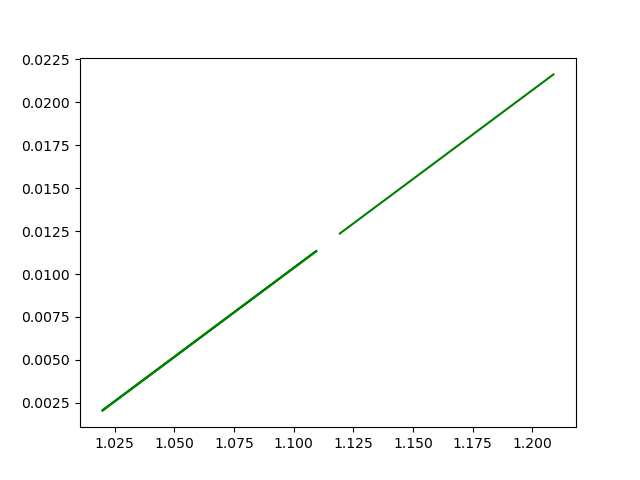

In [43]:
%matplotlib widget
 # importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

x = data[0]
y = data[1]
z = data[2]

 
# creating the plot
plt.plot(x, y, color='green')
plt.show()
 